In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import*

## Problema 1

In [2]:
def P(x):
    return 924*(x**6) - 2772*(x**5) + 3150*(x**4) - 1680*(x**3) + 420*(x**2) - 42*x + 1

Text(0.5, 1.0, 'Gráfico da a')

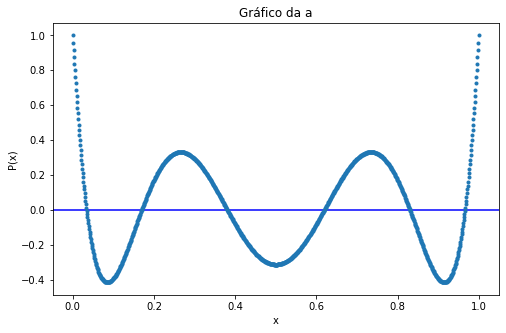

In [3]:
#a)
plt.figure(figsize=(8,5))
x = np.linspace(0,1,1000)
plt.axhline(y=0, color = 'blue')
plt.plot(x,P(x), ".")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Gráfico da a")

Por inspeção as raízes são 0.03377, 0.169185, 0.3804, 0.61962, 0.83083, 0.9660

In [4]:
#b)
def dP(x):
    return 924*6*(x**5) - 2772*5*(x**4) + 3150*4*(x**3) - 1680*3*(x**2) + 420*2*x - 42 

x = [0,0.2,0.4,0.6,0.8,1]
raizes = []
for i in range(0,6):
    X = x[i]
    erro = 100
    e = 1.0e-10
    while (erro>e):
        X2 = X
        X = X - P(X)/dP(X)
        erro = abs(X-X2)
    raizes.append(X)
raizes

[0.03376524289842398,
 0.16939530676686765,
 0.3806904069584,
 0.619309593041593,
 0.8306046932331476,
 0.9662347571016031]

## Problema 2

In [5]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

In [6]:
def f(r):
    t = (R-r)**2
    return r**5 - G*M*t/(w**2) + G*m*(r**2)/(w**2) - 2*R*(r**4) + (R**2)*(r**3)
def df(r):
    return 5*r**4 - (G*M*(2*r-2*R))/(w**2) + 2*G*m*r/(w**2) - 8*R*(r**3) + 3*(R**2)*(r**2)

In [7]:
#Método de Newton
r = 3e8
erro = 100
e = 1e-4
while (erro>e):   
    r2 = r
    r = r - f(r)/df(r)
    erro = abs(r-r2)
r

326045071.6653554

In [8]:
#Método da Secante
r, ro = 3e8, 3.5e8
erro = 100
e = 1e-4
while (erro>e):   
    dF = (f(r)-f(ro))/(r-ro)
    ro = r
    r = r - f(r)/dF
    erro = abs(r-ro)
r

326045071.6653557

## Problema 3

In [9]:
h = 6.6261e-34
c = 2.9979e8
Kb = 1.38e-23
lamb1 = 390e-9
lamb2 = 750e-9

In [10]:
def gaussxw(N):

    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(pi*a+1/(8*N*N*(np.tan(a))))

    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = np.max(abs(dx))

    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

In [11]:
#a)
def g(x):
    return (x**3)/((e**x) - 1)

def N(T):
    n = 100
    b = (h*c)/(lamb1*Kb*T)
    a = (h*c)/(lamb2*Kb*T)
    y, w = gaussxw(n)
    
    x = (((b-a))*y + (b+a))/2
    wl = ((b-a)/2)*w
    
    soma = 0
    for k in range(n):
        soma += wl[k]*g(x[k])
    res = soma*15/(pi**4)
    return res

Text(0.5, 1.0, 'Gráfico da a')

<Figure size 360x216 with 0 Axes>

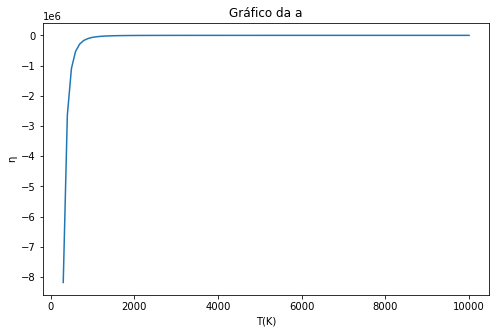

In [12]:
plt.figure(figsize=(5,3))
t = np.linspace(300, 10000, 100)
N_ = []

for i in range(0, 100):
    N_.append(N(t[i]))
    
plt.figure(figsize=(8,5))
plt.plot(t,N_)
plt.xlabel("T(K)")
plt.ylabel("η")
plt.title("Gráfico da a")

Text(0, 0.5, '-η')

<Figure size 360x216 with 0 Axes>

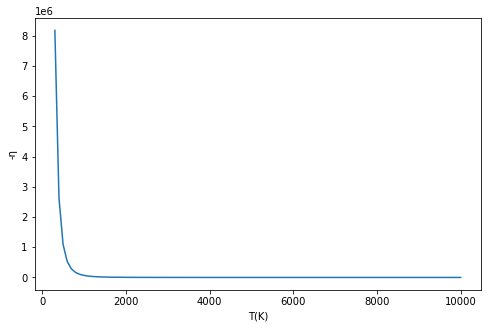

In [13]:
#b)
def InvertN(T):
    return -N(T)

plt.figure(figsize=(5,3))
N_2 = []

for i in range(0, 100):
    N_2.append(InvertN(t[i]))

plt.figure(figsize=(8,5))
plt.plot(t,N_2)
plt.xlabel("T(K)")
plt.ylabel("-η")

In [14]:
z =(1+(5)**(0.5))/2
x1 = 5000
x4 = 8000
x3 = x1 + (x4-x1)/z
x2 = x4 - x3 + x1
while(abs(x4-x1)>1e-5):
    if(InvertN(x2)<InvertN(x3)):
        x4 = x3
        x3 = x2
        x2 = x4 - x3 + x1
    else:
        x1=x2
        x2=x3
        x3 = x1 + (x4-x1)/z
    
Tmáx = (x1+x4)/2
print(Tmáx,"K")

7999.999995948667 K


Não, pois a temperatura de maior eficiência é muito alta. Caso conseguíssemos por essa temperatura na lâmpada, o vidro e o filamento de tungtênio da mesma iria derreter, porque seus pontos de fusão são de 1973K e 3695K, respectivamente.